In [24]:
# Instalación de gensim (por si no está instalado)
try:
    import gensim
except ModuleNotFoundError:
    !pip install gensim
    import gensim

# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de texto y NLTK
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Librerías de Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# LDA - gensim
from gensim import corpora

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print(" Celda 1 ejecutada correctamente. Librerías importadas.")


 Celda 1 ejecutada correctamente. Librerías importadas.


In [26]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

print(" Recursos NLTK descargados correctamente.")



 Recursos NLTK descargados correctamente.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [27]:
#  Cargar Dataset desde Colab
# Ver archivos en la carpeta actual
import os
print(os.listdir("/content"))

# Cargar el archivo con su nombre real
df = pd.read_csv("/content/spam.csv.csv", encoding='latin-1')

df.head()



['.config', 'spam.csv.csv', 'sample_data']


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
# Renombrar columnas v1 y v2
df = df.rename(columns={"v1": "etiqueta", "v2": "texto"})

# Eliminar columnas innecesarias (las 'Unnamed:')
cols_innecesarias = [c for c in df.columns if c.startswith("Unnamed")]
df = df.drop(columns=cols_innecesarias)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   etiqueta  5572 non-null   object
 1   texto     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Cantidad de filas: 5572
Cantidad de columnas: 2

Clases:
 etiqueta
ham     4825
spam     747
Name: count, dtype: int64


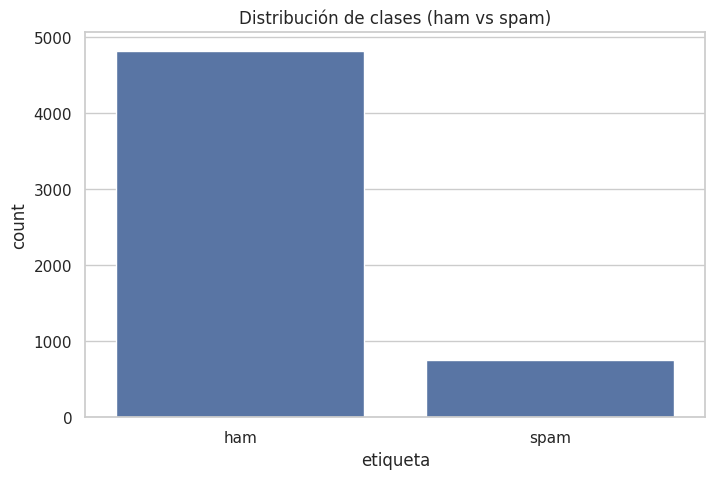

In [29]:
#  EDA

print("Cantidad de filas:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])
print("\nClases:\n", df["etiqueta"].value_counts())

# Visualización de la distribución de clases
sns.countplot(x="etiqueta", data=df)
plt.title("Distribución de clases (ham vs spam)")
plt.show()


In [30]:
# Preprocesamiento de texto

stop_words = set(stopwords.words('english'))  # dataset está en inglés
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Minúsculas
    text = text.lower()

    # 2. Eliminar números y puntuación (dejar solo letras y espacios)
    text = re.sub(r'[^a-z\s]', ' ', text)

    # 3. Tokenizar
    tokens = word_tokenize(text)

    # 4. Eliminar Stop Words y palabras muy cortas
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]

    # 5. Lematización
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    # 6. Reconstruir el texto
    text_limpio = " ".join(tokens)
    return text_limpio


In [31]:
# Crear columna texto_limpio

df["texto_limpio"] = df["texto"].apply(preprocess_text)
df[["etiqueta", "texto", "texto_limpio"]].head()


,etiqueta,texto,texto_limpio
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [32]:
# Vectorización y división de datos

X = df["texto_limpio"]
y = df["etiqueta"]

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)


=== MultinomialNB - Reporte de Clasificación ===
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.99      0.74      0.85       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



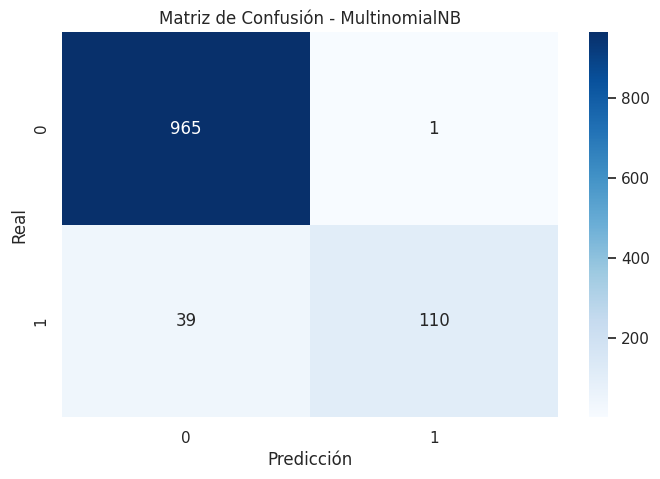

In [33]:
# Modelo MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("=== MultinomialNB - Reporte de Clasificación ===")
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de Confusión - MultinomialNB")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


=== LogisticRegression - Reporte de Clasificación ===
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       0.97      0.72      0.83       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



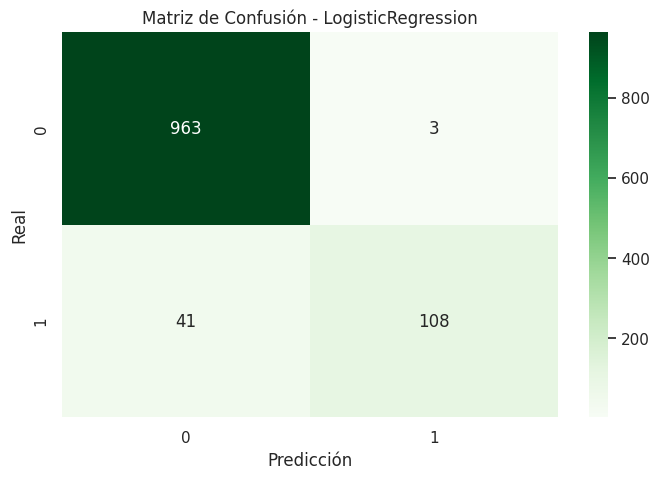

In [34]:
#  Modelo LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("=== LogisticRegression - Reporte de Clasificación ===")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Greens")
plt.title("Matriz de Confusión - LogisticRegression")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [35]:
y_pred_lr = lr_model.predict(X_test)


In [37]:

# Filtrar mensajes clasificados SPAM

from sklearn.metrics import f1_score

# F1-score en la clase spam
f1_nb = f1_score(y_test, y_pred_nb, pos_label="spam")
f1_lr = f1_score(y_test, y_pred_lr, pos_label="spam")

print("F1-score Naive Bayes:", f1_nb)
print("F1-score Logistic Regression:", f1_lr)

# Elegir mejor modelo
if f1_nb >= f1_lr:
    mejor_modelo = nb_model
    nombre_modelo = "Naive Bayes"
else:
    mejor_modelo = lr_model
    nombre_modelo = "Logistic Regression"

print("\n Modelo seleccionado:", nombre_modelo)


# Nuevo: predecir TODO EL DATASET

X_all = tfidf.transform(df["texto_limpio"])   # vectoriza todo
pred_all = mejor_modelo.predict(X_all)        # predicciones completas

# Guardar en un DataFrame copia
df_pred = df.copy()
df_pred["prediccion"] = pred_all

# Filtrar SPAM
df_spam = df_pred[df_pred["prediccion"] == "spam"].copy()

print("\nTotal de mensajes clasificados como spam:", df_spam.shape[0])
df_spam[["texto", "texto_limpio"]].head()



F1-score Naive Bayes: 0.8461538461538461
F1-score Logistic Regression: 0.8307692307692308

 Modelo seleccionado: Naive Bayes

Total de mensajes clasificados como spam: 598


,texto,texto_limpio
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
8,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,Had your mobile 11 months or more? U R entitle...,mobile month entitled update latest colour mob...
11,"SIX chances to win CASH! From 100 to 20,000 po...",six chance win cash pound txt csh send cost da...
12,URGENT! You have won a 1 week FREE membership ...,urgent week free membership prize jackpot txt ...


In [38]:
#  Preparar textos para LDA (tokens)

# Volvemos a tokenizar los textos limpios como lista de tokens
spam_tokens = [doc.split() for doc in df_spam["texto_limpio"]]

# Crear diccionario y corpus
dictionary = corpora.Dictionary(spam_tokens)

# Filtrar palabras muy raras o demasiado frecuentes si quieres (opcional)
# dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in spam_tokens]

len(dictionary), len(corpus)


(1304, 598)

In [39]:
#  Modelo LDA

num_topics = 4

lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=10,
    random_state=42
)

# Mostrar tópicos
for i, topic in lda_model.print_topics(num_topics=num_topics, num_words=8):
    print(f"Tópico {i}: {topic}")


Tópico 0: 0.042*"free" + 0.027*"call" + 0.023*"tone" + 0.023*"mobile" + 0.020*"txt" + 0.019*"text" + 0.016*"reply" + 0.016*"www"
Tópico 1: 0.028*"call" + 0.014*"free" + 0.014*"text" + 0.011*"receive" + 0.011*"latest" + 0.011*"claim" + 0.011*"www" + 0.011*"txt"
Tópico 2: 0.048*"call" + 0.025*"claim" + 0.020*"prize" + 0.018*"guaranteed" + 0.017*"urgent" + 0.017*"please" + 0.015*"show" + 0.015*"customer"
Tópico 3: 0.040*"call" + 0.020*"stop" + 0.020*"box" + 0.019*"cash" + 0.018*"txt" + 0.015*"prize" + 0.014*"free" + 0.013*"claim"
